In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap
import calendar

## **Cleaning dan Load Dataset**

In [48]:
# Load dataset
# df = pd.read_csv('drive/MyDrive/Kuliah/Supplement_Sales_Weekly_Expanded.csv')
df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

available_years = sorted(df['Year'].unique())
requested_years = range(2020, 2026)

In [49]:
date_check = pd.to_datetime(df['Date'], errors='coerce').isnull().sum()

duplicate_count = df.duplicated().sum()

missing_values = df.isnull().sum()

text_columns = ['Product Name', 'Category', 'Location', 'Platform']
text_format_issues = {
    col: df[col].str.contains(r'^\s+|\s+$').sum() + df[col].str.contains(r'[A-Z]').sum()
    for col in text_columns
}

{
    "Invalid Dates": date_check,
    "Duplicate Rows": duplicate_count,
    "Missing Values": missing_values,
    "Text Format Issues": text_format_issues
}

{'Invalid Dates': np.int64(0),
 'Duplicate Rows': np.int64(0),
 'Missing Values': Date              0
 Product Name      0
 Category          0
 Units Sold        0
 Price             0
 Revenue           0
 Discount          0
 Units Returned    0
 Location          0
 Platform          0
 Year              0
 Month             0
 dtype: int64,
 'Text Format Issues': {'Product Name': np.int64(4384),
  'Category': np.int64(4384),
  'Location': np.int64(4384),
  'Platform': np.int64(4384)}}

Data sudah cukup bersih untuk di analisis

## **Analisis Tren dan Puncak Penjualan**

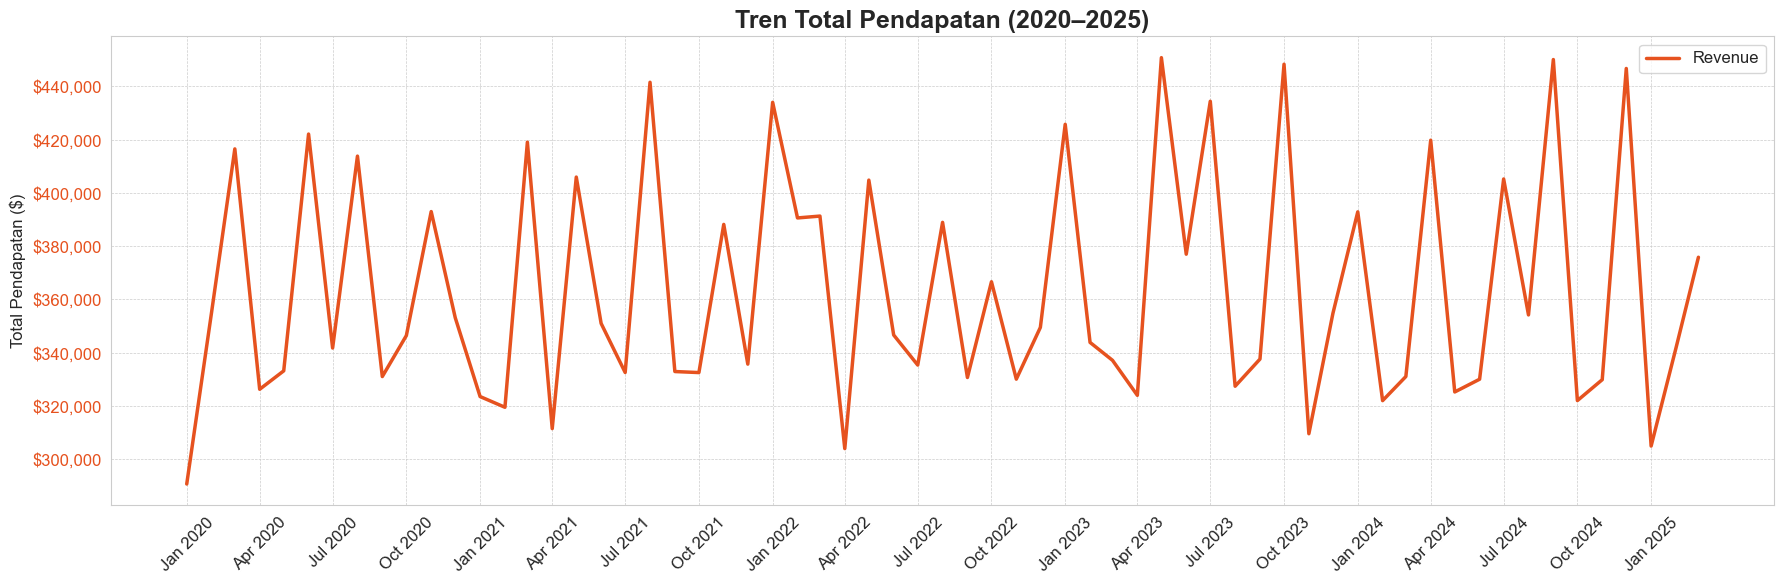

In [55]:

# --- Filter hanya tahun yang tersedia ---
valid_years = [year for year in requested_years if year in available_years]
df_filtered = df[df['Year'].isin(valid_years)].copy()

# --- Gabungkan kolom Year dan Month jadi satu datetime ---
df_filtered['Date'] = pd.to_datetime(df_filtered['Year'].astype(str) + '-' + df_filtered['Month'].astype(str).str.zfill(2) + '-01')

# --- Group by date dan agregasi data ---
monthly_sales = df_filtered.groupby('Date').agg({
    'Revenue': 'sum',
}).reset_index()

# --- Sort berdasarkan waktu ---
monthly_sales.sort_values('Date', inplace=True)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(18, 6))
color = '#E6521F'  # Oranye stabil dari paletmu

ax.set_title('Tren Total Pendapatan (2020–2025)', fontsize=18, weight='bold')
ax.plot(monthly_sales['Date'], monthly_sales['Revenue'], color=color, linewidth=2.5, label='Revenue')
ax.set_ylabel('Total Pendapatan ($)', fontsize=12)
ax.tick_params(axis='y', labelcolor=color)
ax.get_yaxis().set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# --- Format x-axis ---
tick_interval = 3
xticks = monthly_sales['Date'][::tick_interval]
ax.set_xticks(xticks)
ax.set_xticklabels([d.strftime('%b %Y') for d in xticks], rotation=45)

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()

> grafik diatas adalah grafik yang menampilkan tren tersebut untuk tiap 3 bulan. Pada setiap grafik, garis biru menunjukkan Total Pendapatan.

Dari grafik di atas, kita dapat menarik beberapa kesimpulan penting untuk menjawab pertanyaan

### **1. Bagaimana tren pendapatan dan unit terjual secara bulanan?**

Secara umum, tren penjualan dan unit terjual di setiap tahunnya menunjukkan pola yang cukup konsisten, pendapantan cenderung melonjak tajam (puncak) di sekitar setiap kuartal yang kemudian diikuti oleh penurunan. Pola ini terlihat cukup konsisten di setiap tahunnya.

## **Analisis Diskon**

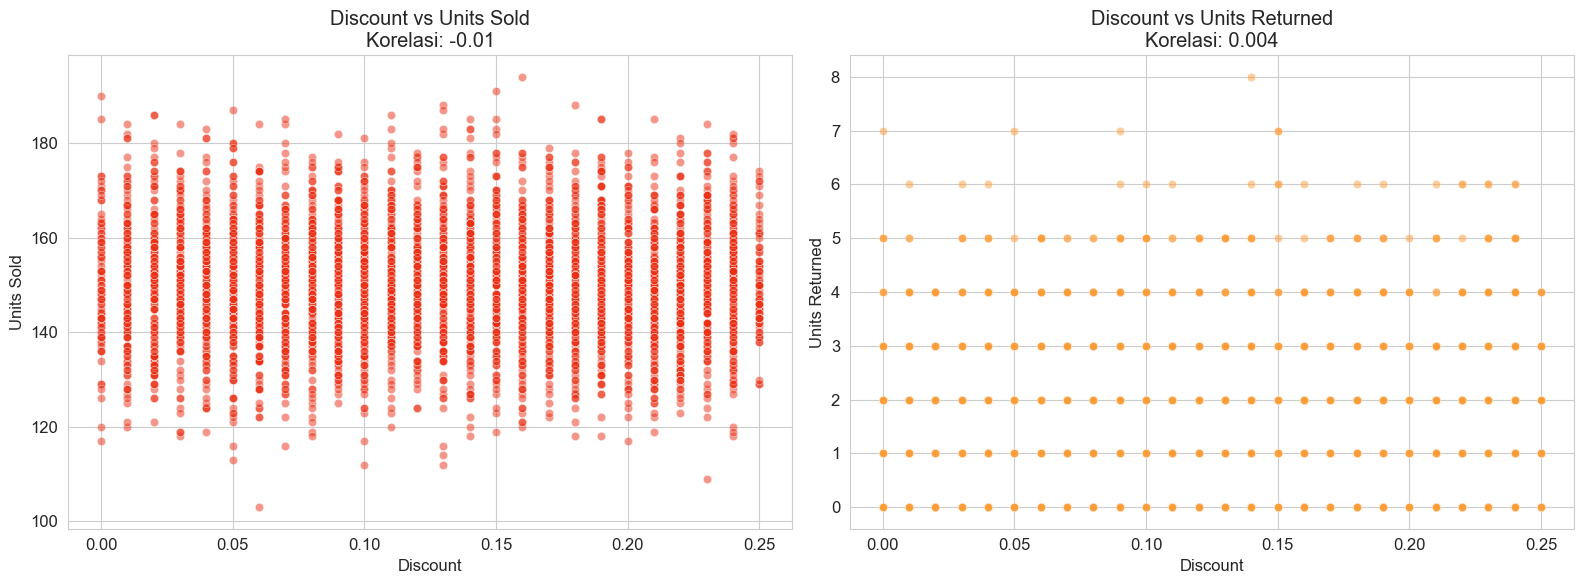

In [54]:
# --- Hitung korelasi antara diskon dan units sold / returned--- 
correlation_sold = df['Discount'].corr(df['Units Sold'])
correlation_returned = df['Discount'].corr(df['Units Returned'])

# --- scatter plot ---
plt.figure(figsize=(16, 6))

# --- Plot untuk Units Sold --- 
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='Discount',
    y='Units Sold',
    color='#EA2F14',  # Merah gelap
    alpha=0.5
)
plt.title(f'Discount vs Units Sold\nKorelasi: {correlation_sold:.2f}')
plt.xlabel('Discount')
plt.ylabel('Units Sold')

# --- Plot untuk Units Returned ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='Discount',
    y='Units Returned',
    color='#FB9E3A',  # Oranye terang
    alpha=0.5
)
plt.title(f'Discount vs Units Returned\nKorelasi: {correlation_returned:.3f}')
plt.xlabel('Discount')
plt.ylabel('Units Returned')

plt.tight_layout()
plt.show()


### **2. Bagaimana diskon memengaruhi perilaku pelanggan, seperti Unit yang Terjual atau Unit yang Dikembalikan?**
* Diskon vs Units Sold: Korelasi ≈ 0.01
→ Ini adalah korelasi positif yang sangat lemah, artinya saat diskon naik, penjualan cenderung sedikit meningkat, tapi pengaruhnya tidak besar.

* Diskon vs Units Returned: Korelasi ≈ 0.004
→ Korelasi ini hampir tidak ada, jadi diskon tidak signifikan memicu peningkatan retur.

* Diskon memang membantu meningkatkan penjualan, tapi efeknya kecil.
* Tidak ada bukti kuat bahwa diskon tinggi membuat pelanggan lebih sering melakukan retur.

## **Analisis Kinerja Produk**

C:\Users\bdstd\AppData\Local\Temp\ipykernel_5152\2647335415.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


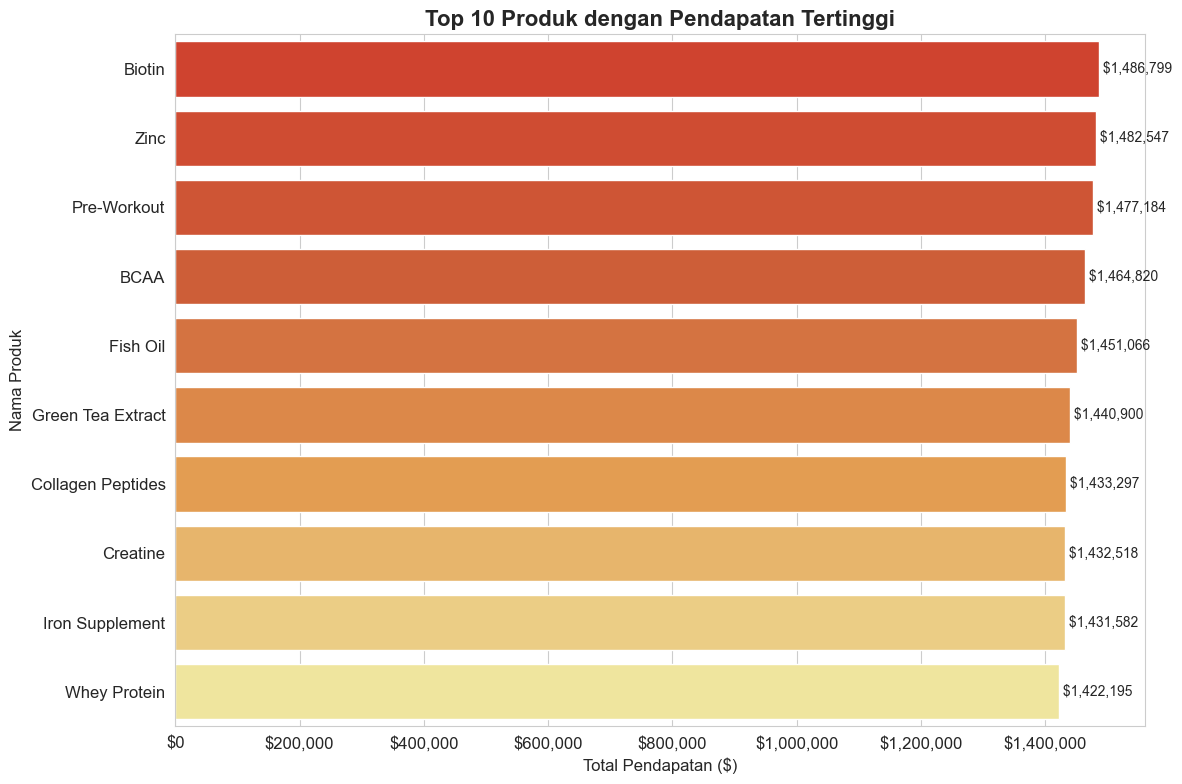

C:\Users\bdstd\AppData\Local\Temp\ipykernel_5152\2647335415.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


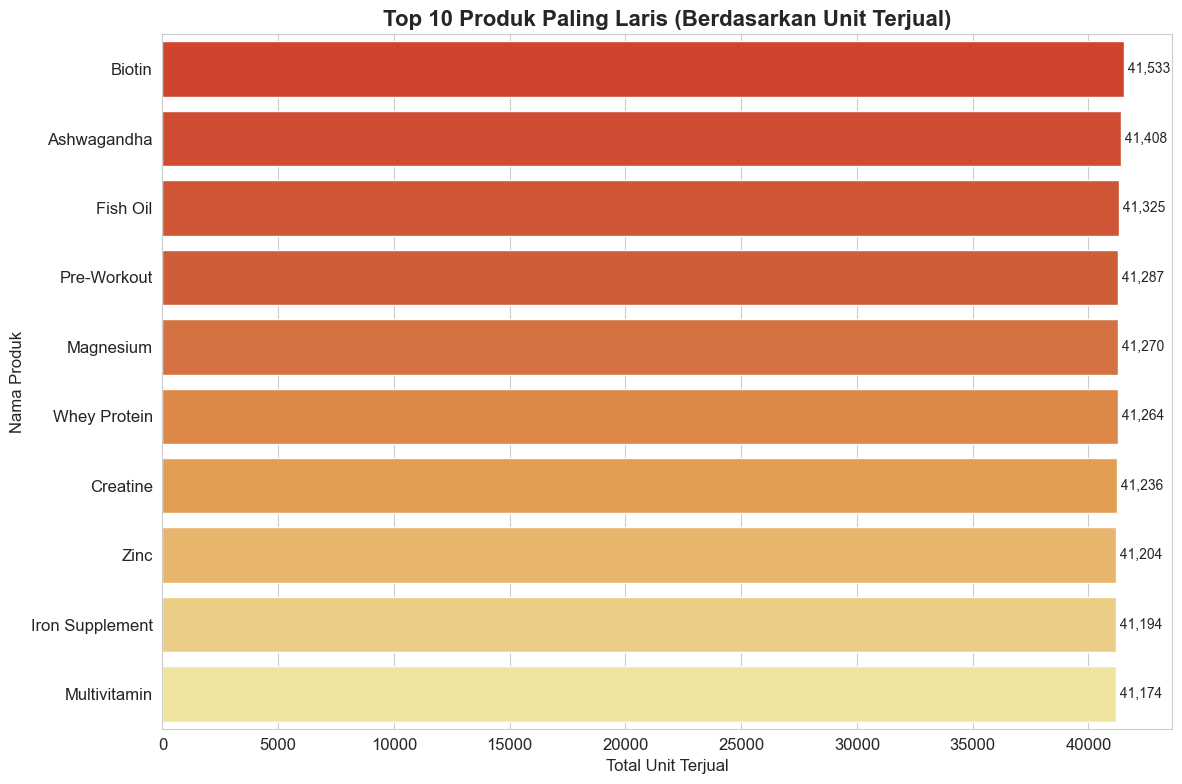

In [52]:
# --- 1. Analisis Performa Produk (Pendapatan dan Unit Terjual) ---

# Group by Product Name and sum the Revenue and Units Sold
product_performance = df.groupby('Product Name').agg({
    'Revenue': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Sort products by Revenue to find the best and worst
top_products_by_revenue = product_performance.sort_values(by='Revenue', ascending=False).head(10)
worst_products_by_revenue = product_performance.sort_values(by='Revenue', ascending=True).head(10)

# Sort products by Units Sold to find the best and worst
top_products_by_units = product_performance.sort_values(by='Units Sold', ascending=False).head(10)
worst_products_by_units = product_performance.sort_values(by='Units Sold', ascending=True).head(10)


# --- 2. Analisis Performa Kategori ---

# Group by Category and sum the Units Sold
category_performance = df.groupby('Category').agg({
    'Units Sold': 'sum'
}).reset_index().sort_values(by='Units Sold', ascending=False)


# --- 3. Visualisasi ---


# --- Buat gradasi 10 warna ---
hex_colors = ['#EA2F14', '#E6521F', '#FB9E3A', '#FCEF91']
custom_cmap = LinearSegmentedColormap.from_list("custom", hex_colors, N=10)
palette_gradient = [custom_cmap(i/9) for i in range(10)]  # 10 warna dari cmap

# --- Grafik 1: Top 10 Produk Berdasarkan Pendapatan ---
plt.figure()
ax1 = sns.barplot(
    x='Revenue',
    y='Product Name',
    data=top_products_by_revenue,
    palette=palette_gradient
)
ax1.set_title('Top 10 Produk dengan Pendapatan Tertinggi', fontsize=16, weight='bold')
ax1.set_xlabel('Total Pendapatan ($)', fontsize=12)
ax1.set_ylabel('Nama Produk', fontsize=12)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
for index, value in enumerate(top_products_by_revenue['Revenue']):
    ax1.text(value, index, f' ${value:,.0f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# --- Grafik 2: Top 10 Produk Berdasarkan Unit Terjual ---
plt.figure()
ax2 = sns.barplot(
    x='Units Sold',
    y='Product Name',
    data=top_products_by_units,
    palette=palette_gradient
)
ax2.set_title('Top 10 Produk Paling Laris (Berdasarkan Unit Terjual)', fontsize=16, weight='bold')
ax2.set_xlabel('Total Unit Terjual', fontsize=12)
ax2.set_ylabel('Nama Produk', fontsize=12)
for index, value in enumerate(top_products_by_units['Units Sold']):
    ax2.text(value, index, f' {value:,.0f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

### **3. Bagaimana Implikasi dari Produk yang Menghasilkan Pendapatan Tertinggi dan Paling Banyak terjual?**

**Biotin** adalah produk yang memberikan pendapatan paling tinggi, diikuti oleh **Zinc** dan **Pre-Workout**. Ini menunjukkan bahwa pelanggan bersedia membayar lebih atau membeli dalam jumlah besar untuk produk-produk ini

**Biotin** adalah produk yang paling laris dari segi unit terjual, diikuti oleh **Ashwaganda** dan **Fish Oil**

### **Sinergi Antara Kategori dan Produk Unggulan**

Kita bisa melihat hubungan kuat antara performa kategori dan produk individual di dalamnya.
* **Kategori Mineral & Vitamin Dominan**: Dua kategori teratas (Mineral dan Vitamin) menyumbang penjualan unit yang sangat besar (total ~247.000 unit). Dominasi ini terefleksikan pada produk individual:
    * **Biotin** (kategori Vitamin) adalah juara di kedua metrik: pendapatan dan unit terjual.
    * **Zinc** dan **Iron Supplement** (kategori Mineral) keduanya berada di Top 10 pendapatan dan unit terjual.
* **Kategori Performance**: Kategori ini berada di posisi #3, didorong oleh produk-produk bernilai tinggi seperti **Pre-Workout**, **BCAA**, dan **Creatine** yang semuanya masuk dalam Top 10 pendapatan. Ini menunjukkan bahwa pelanggan yang mencari produk performa bersedia membelanjakan lebih banyak uang.

### **Identifikasi Star Products, High-Margin Products, Volume Drivers**

Berdasarkan analisis, kita dapat mengelompokkan produk secara strategis:

* **Star Products**: Produk yang kuat di kedua metrik (pendapatan dan volume).
    * **Contoh**: Biotin, Zinc, Pre-Workout, Fish Oil.
    * **Implikasi**: Ini adalah produk inti Anda. Pastikan stok selalu tersedia, promosikan secara luas, dan pertahankan kualitasnya.

* **High-Margin Products**: Produk dengan pendapatan tinggi tetapi volume penjualan tidak masuk 10 besar.
    * **Contoh**: BCAA, Green Tea Extract, Collagen Peptides.
    * **Implikasi**: Produk-produk ini sangat menguntungkan per unitnya. Pemasaran harus fokus pada kualitas, keunikan, dan manfaat premium untuk membenarkan harganya. Jangan bersaing harga untuk produk ini.

* **Volume Drivers**: Produk dengan volume penjualan sangat tinggi tetapi tidak masuk 10 besar pendapatan.
    * **Contoh**: Ashwagandha, Magnesium, Multivitamin.
    * **Implikasi**: Ini adalah produk "pintu masuk" Anda. Harganya yang terjangkau menarik banyak pelanggan. Gunakan produk ini untuk akuisisi pelanggan baru. Mereka mungkin memiliki margin tipis, tetapi sangat penting untuk volume dan traffic.

### **Rekomendasi Strategis**

1.  **Strategi Bundling & Cross-Selling**:
    * Buat "Paket Fondasi Kesehatan" yang berisi **Multivitamin** (Volume Drivers), **Zinc** (Star Product), dan **Fish Oil** (Star Product). Ini menggabungkan produk bervolume tinggi dengan produk bernilai tinggi.
    * Tawarkan "Paket Performa Ultimate" yang berisi **Pre-Workout** (Star Products) dan **BCAA** (High-Margin Products). Ini menargetkan segmen pelanggan yang bersedia membayar lebih.
    * Saat pelanggan membeli **Ashwagandha** (Volume Drivers), tawarkan diskon kecil untuk **Biotin** (Star Products) untuk meningkatkan nilai keranjang belanja (Average Order Value).

2.  **Penyesuaian Strategi Pemasaran**:
    * Untuk **BCAA**, jalankan kampanye yang berfokus pada "efektivitas maksimal" dan "formulasi premium", bukan pada harga.
    * Untuk **Biotin**, gunakan slogan seperti "Produk Terlaris & Paling Dicintai Pelanggan" untuk memanfaatkan bukti sosial (social proof).
    * Gunakan **Ashwagandha** dan **Magnesium** dalam iklan akuisisi pelanggan baru karena harganya yang menarik dan popularitasnya yang tinggi.

3.  **Manajemen Inventaris**:
    * Prioritaskan ketersediaan stok *tanpa putus* untuk para **Star Products** (Biotin, Zinc, Pre-Workout). Kehabisan stok pada produk ini berarti kehilangan pendapatan dan volume penjualan yang signifikan.
    * Untuk **Volume Drivers** (Ashwagandha), pertahankan level stok yang sangat tinggi untuk mengantisipasi permintaan volume yang konsisten.
    * Untuk **High-Margin Products** (BCAA), manajemen stok bisa lebih ramping karena volume penjualannya lebih rendah, namun pastikan tetap tersedia untuk pelanggan loyal yang mencarinya.

## **Analisis Platform Penjualan**

C:\Users\bdstd\AppData\Local\Temp\ipykernel_5152\2593889947.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=platform_performance.index, y=platform_performance.values, legend=False, palette = platform_colors)


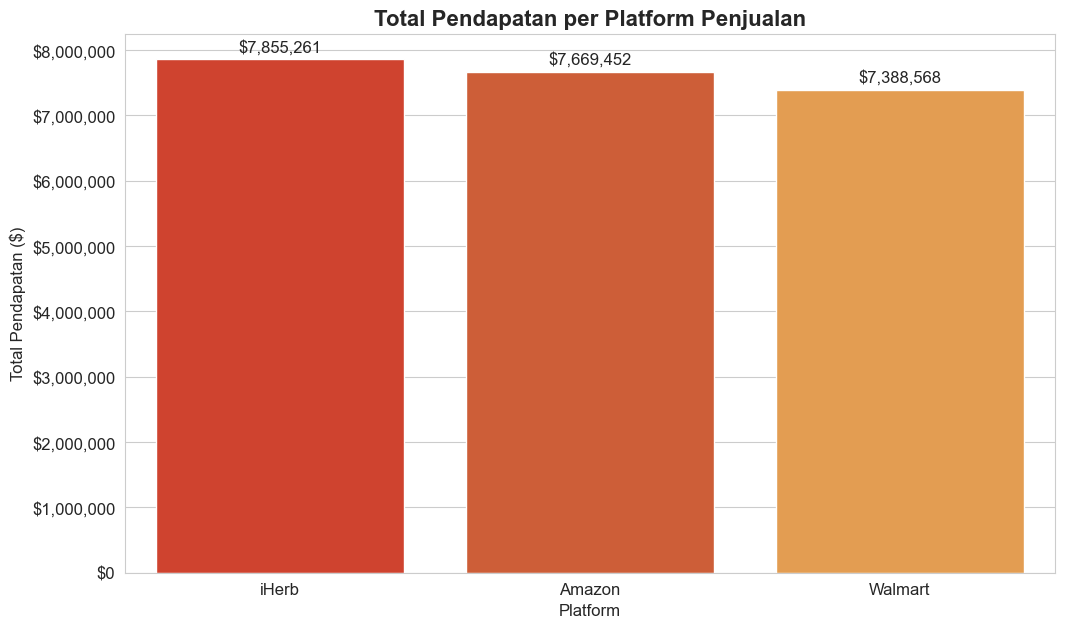

In [53]:
# --- 2. Analisis Efektivitas Platform Penjualan ---

# Group by Platform and sum the Revenue
platform_performance = df.groupby('Platform')['Revenue'].sum().sort_values(ascending=False)

# --- 3. Analisis Produk Populer per Negara ---

# Group by Location and Product Name, sum Units Sold
popular_products_by_location = df.groupby(['Location', 'Product Name'])['Units Sold'].sum().reset_index()
# Find the product with the max units sold for each location
top_product_per_location = popular_products_by_location.loc[popular_products_by_location.groupby('Location')['Units Sold'].idxmax()]

# --- 4. Analisis Produk Populer per Platform ---

# Group by Platform and Product Name, sum Units Sold
popular_products_by_platform = df.groupby(['Platform', 'Product Name'])['Units Sold'].sum().reset_index()
# Find the product with the max units sold for each platform
top_product_per_platform = popular_products_by_platform.loc[popular_products_by_platform.groupby('Platform')['Units Sold'].idxmax()]

# --- 5. Visualisasi ---

# Set plot style
sns.set_style("whitegrid")


# --- Grafik 2: Efektivitas Platform Penjualan (Bar Chart) ---
platform_colors = {
    'iHerb': '#EA2F14',   # biru
    'Amazon': '#E6521F',  # merah
    'Walmart': '#FB9E3A'     # hijau
}
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=platform_performance.index, y=platform_performance.values, legend=False, palette = platform_colors)
ax.set_title('Total Pendapatan per Platform Penjualan', fontsize=16, weight='bold')
ax.set_xlabel('Platform', fontsize=12)
ax.set_ylabel('Total Pendapatan ($)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
# Add labels to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

### **4. Platform mana yang menghasilkan total pendapatan tertinggi secara keseluruhan?**

Berdasarkan grafik **"Total Pendapatan per Platform Penjualan"**, berikut adalah **insight** dan **rekomendasi strategis** yang dapat diambil:

#### **Insight**

1. **iHerb Memimpin Pendapatan**

   * iHerb mencatat total pendapatan tertinggi: **\$7,855,261**, mengungguli Amazon dan Walmart.
   * Selisih dengan Amazon sekitar **\$185,809**, dan dengan Walmart sekitar **\$466,693**.

2. **Performa Amazon & Walmart Relatif Seimbang**

   * Amazon dan Walmart juga menunjukkan performa kuat, tetapi terdapat indikasi bahwa iHerb memiliki **daya tarik pasar yang lebih tinggi untuk kategori suplemen**.

3. **Dominasi Pendapatan Tersebar Tipis**

   * Perbedaan antar platform relatif kecil (<10%), artinya ketiganya sama-sama relevan dan penting untuk saluran distribusi.

#### **Rekomendasi Strategis**

**1. Tingkatkan Fokus pada iHerb sebagai Platform Utama**

* Investasikan lebih banyak untuk promosi produk unggulan di iHerb.
* Optimalkan strategi SEO & pencitraan produk untuk menjaga keunggulan kompetitif.
* Evaluasi mengapa iHerb unggul — apakah karena **harga, promosi, atau user experience?** Replikasi keberhasilannya di platform lain.

**2. Dorong Inovasi dan Promosi di Amazon**

* Karena Amazon mendekati iHerb, **sedikit insentif tambahan** seperti bundling produk, diskon loyalitas, atau iklan bersponsor bisa mendongkrak pendapatan signifikan.
* Gunakan data pembeli Amazon untuk segmentasi pelanggan dan personalisasi penawaran.

**3. Revitalisasi Strategi Penjualan di Walmart**

* Analisis apakah **Walmart tertinggal** karena masalah harga, visibilitas produk, atau preferensi demografis.
* Uji coba kampanye berbasis lokasi untuk memaksimalkan potensi penjualan regional (misal: promosi eksklusif untuk wilayah AS).

**4. Segmentasi Platform Berdasarkan Produk**

* Jika memungkinkan, posisikan kategori produk unggulan secara strategis:

  * iHerb: Produk premium atau niche (misalnya, vegan protein).
  * Amazon: Produk dengan **rating tinggi dan volume penjualan besar**.
  * Walmart: Paket bundling atau produk yang lebih terjangkau.

